In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
GSPC = pd.read_csv('GSPC.csv', index_col='Date')
GSPC = GSPC.iloc[:, 1:]
GSPC.index = pd.to_datetime(GSPC.index)
GSPC.head()

,Open,High,Low,Close,Volume
Date,,,,,
2014-01-02,1845.859985,1845.859985,1827.739990,1831.979980,3.080600e+09
2014-01-03,1833.209961,1838.239990,1829.130005,1831.369995,2.774270e+09
2014-01-06,1832.310059,1837.160034,1823.729980,1826.770020,3.294850e+09
2014-01-07,1828.709961,1840.099976,1828.709961,1837.880005,3.511750e+09
2014-01-08,1837.900024,1840.020020,1831.400024,1837.489990,3.652140e+09


In [3]:
close = GSPC.Close
high = GSPC.High
low = GSPC.Low

In [4]:
close

Date
2014-01-02    1831.979980
2014-01-03    1831.369995
2014-01-06    1826.770020
2014-01-07    1837.880005
2014-01-08    1837.489990
                 ...     
2015-04-24    2117.689941
2015-04-27    2108.919922
2015-04-28    2114.760010
2015-04-29    2106.850098
2015-04-30    2085.510010
Name: Close, Length: 334, dtype: float64

In [5]:
date = close.index.to_series()
ndate = len(date)

In [6]:
ndate

334

In [7]:
periodHigh=pd.Series(np.zeros(ndate-8),\
                  index=date.index[8:])
periodLow=pd.Series(np.zeros(ndate-8),\
                    index=date.index[8:])

In [8]:
RSV=pd.Series(np.zeros(ndate-8),\
               index=date.index[8:])

In [9]:
RSV

Date
2014-01-14    0.0
2014-01-15    0.0
2014-01-16    0.0
2014-01-17    0.0
2014-01-21    0.0
             ... 
2015-04-24    0.0
2015-04-27    0.0
2015-04-28    0.0
2015-04-29    0.0
2015-04-30    0.0
Length: 326, dtype: float64

In [10]:
for j in range(8, ndate):
    period = date[j - 8:j + 1]
    i = date[j]
    periodHigh[i] = high[period].max()
    periodLow[i] = low[period].min()
    RSV[i]=100*(close[i]-periodLow[i])\
           /(periodHigh[i]-periodLow[i])
    periodHigh.name = 'periodHigh'
    periodLow.name = 'periodLow'
    RSV.name = 'RSV'

In [11]:
periodHigh.head()

Date
2014-01-14    1845.859985
2014-01-15    1850.839966
2014-01-16    1850.839966
2014-01-17    1850.839966
2014-01-21    1850.839966
Name: periodHigh, dtype: float64

In [12]:
periodLow.head()

Date
2014-01-14    1815.52002
2014-01-15    1815.52002
2014-01-16    1815.52002
2014-01-17    1815.52002
2014-01-21    1815.52002
Name: periodLow, dtype: float64

In [13]:
RSV.head()

Date
2014-01-14    76.994107
2014-01-15    93.035207
2014-01-16    85.985395
2014-01-17    65.628444
2014-01-21    80.068155
Name: RSV, dtype: float64

In [14]:
RSV.describe()

count    326.000000
mean      63.558226
std       31.525472
min        0.000000
25%       37.323359
50%       72.580422
75%       91.854801
max      100.000000
Name: RSV, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002500A57C788>,
      dtype=object)

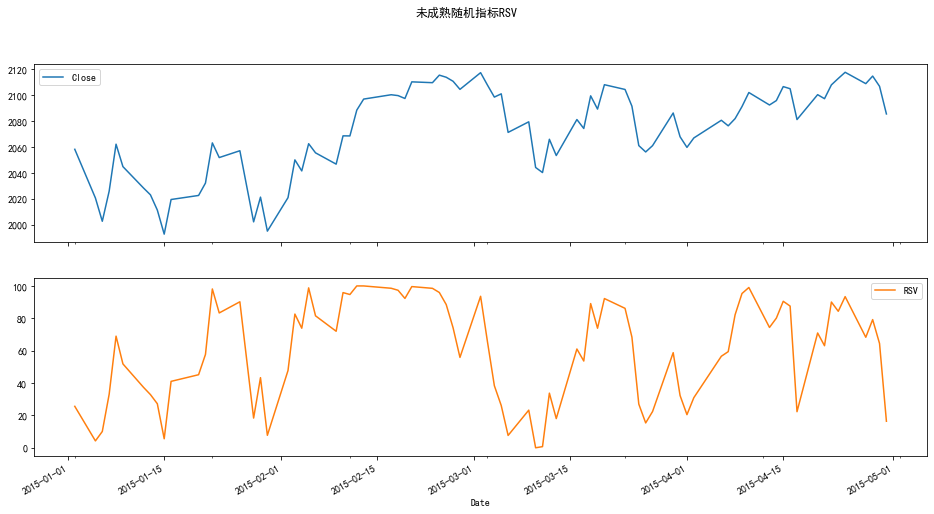

In [15]:
plt.rcParams['font.sans-serif'] = ['SimHei']

close1 = close['2015']
RSV1 = RSV['2015']
Cl_RSV = pd.DataFrame([close1, RSV1]).transpose()
Cl_RSV.plot(subplots=True, title='未成熟随机指标RSV', figsize=(16, 8))

D:\Programing\Anaconda3\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)
D:\Programing\Anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
D:\Programing\Anaconda3\lib\site-packages\pandas\core\indexing.py:1047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

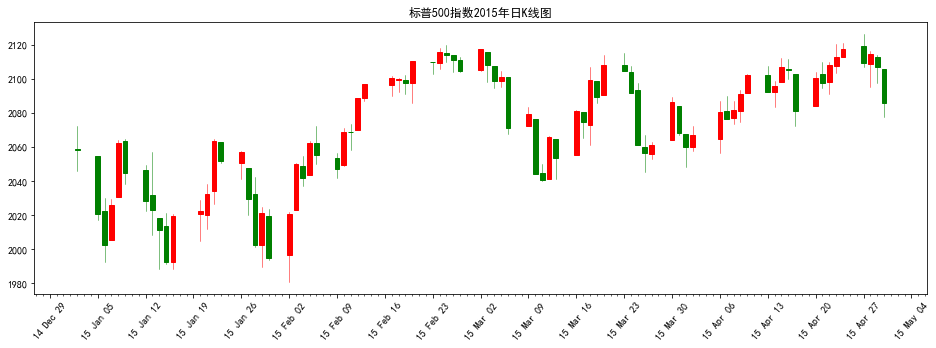

In [16]:
GSPC2015 = GSPC['2015']
plt.figure(figsize=(16, 5))
import candle
candle.candlePlot(GSPC2015,\
                '标普500指数2015年日K线图')

In [17]:
RSV1 = pd.Series([50, 50], index=date[6:8]).append(RSV)  # 添加前值
RSV1.name = 'RSV'
RSV1.head()

Date
2014-01-10    50.000000
2014-01-13    50.000000
2014-01-14    76.994107
2014-01-15    93.035207
2014-01-16    85.985395
Name: RSV, dtype: float64

In [18]:
KValue = pd.Series(0.0, index=RSV1.index)

In [19]:
KValue[0] = 50
for i in range(1, len(RSV1)):
    KValue[i] = 2 / 3 * KValue[i - 1] + RSV1[i] / 3
KValue.name = 'KValue'
KValue.head()

Date
2014-01-10    50.000000
2014-01-13    50.000000
2014-01-14    58.998036
2014-01-15    70.343759
2014-01-16    75.557638
Name: KValue, dtype: float64

In [20]:
DValue = pd.Series(0.0, index=RSV1.index)
DValue[0] = 50
for i in range(1, len(RSV1)):
    DValue[i] = 2 / 3 * DValue[i - 1] + KValue[i] / 3

KValue = KValue[1:]
DValue.name = 'DValue'
DValue = DValue[1:]
DValue.head()

Date
2014-01-13    50.000000
2014-01-14    52.999345
2014-01-15    58.780817
2014-01-16    64.373090
2014-01-17    66.998029
Name: DValue, dtype: float64

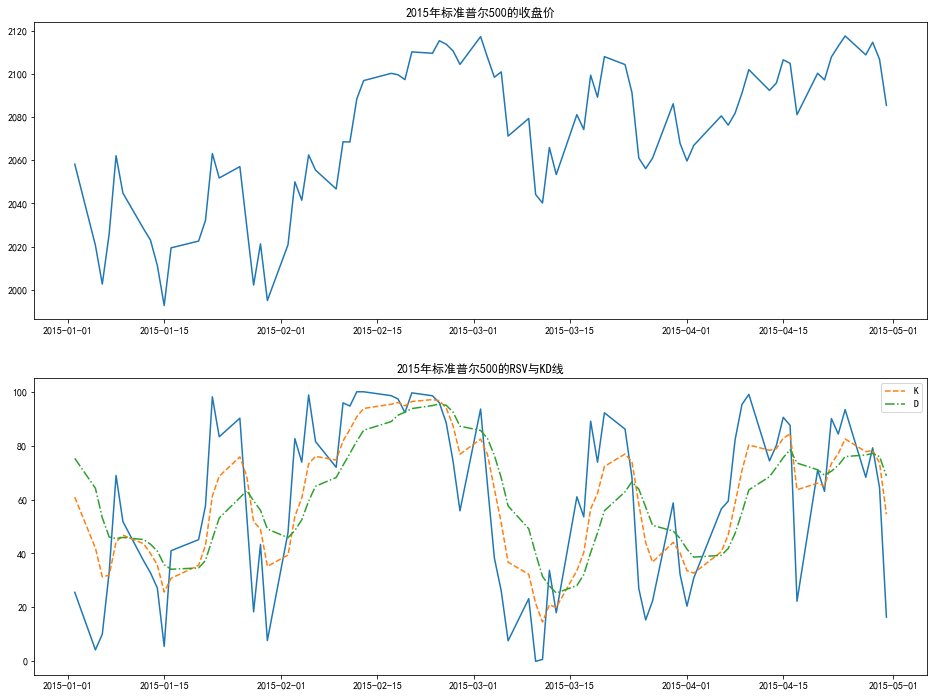

In [21]:
plt.figure(figsize=(16, 12))
plt.rcParams['font.family'] = ['SimHei']
plt.subplot(211)
plt.title('2015年标准普尔500的收盘价')
plt.plot(close['2015'])
plt.subplot(212)
plt.title('2015年标准普尔500的RSV与KD线')
plt.plot(RSV['2015'])
plt.plot(KValue['2015'], linestyle='dashed', label='K')
plt.plot(DValue['2015'], linestyle='-.', label='D')
plt.legend(loc='best')

In [22]:
JValue = 3 * KValue - 2 * DValue
JValue.name = 'JValue'
JValue.head()

Date
2014-01-13    50.000000
2014-01-14    70.995416
2014-01-15    93.469645
2014-01-16    97.926733
2014-01-17    82.747662
Name: JValue, dtype: float64

D:\Programing\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Programing\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


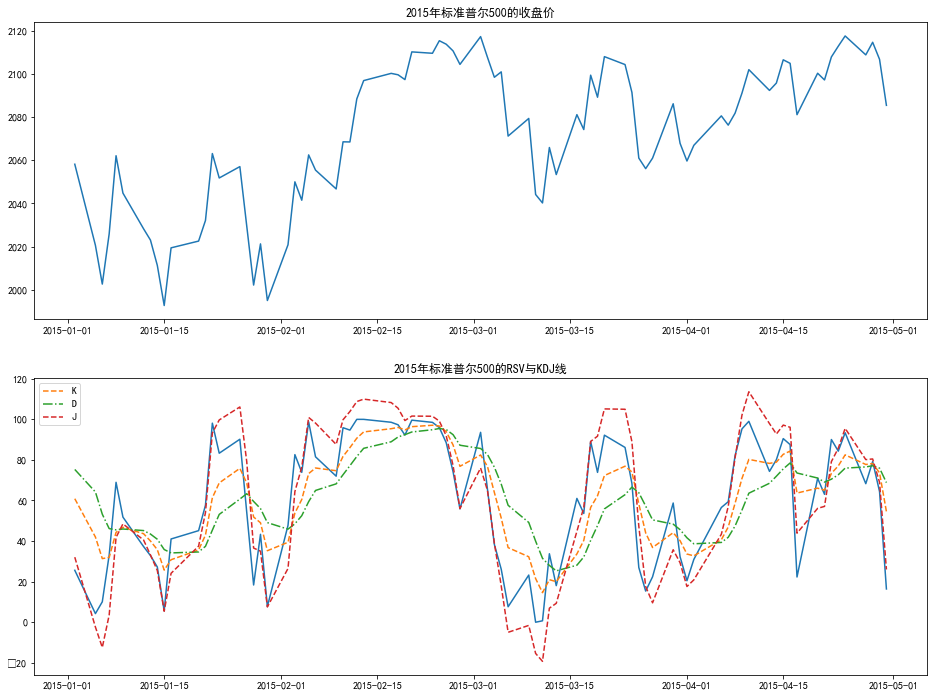

In [30]:
plt.figure(figsize=(16, 12))
plt.subplot(211)
plt.title('2015年标准普尔500的收盘价')
plt.plot(close['2015'])
plt.subplot(212)
plt.title('2015年标准普尔500的RSV与KDJ线')
plt.plot(RSV['2015'])
plt.plot(KValue['2015'], linestyle='dashed', label='K')
plt.plot(DValue['2015'], linestyle='-.', label='D')
plt.plot(JValue['2015'], linestyle='--', label='J')
plt.legend(loc='upper left')

In [31]:
KSignal=KValue.apply(lambda x:\
                    -1 if x>85 else 1 if x<20 else 0)

DSignal=DValue.apply(lambda x: \
                 -1 if x>80 else 1 if x<20 else 0)
KDSignal = KSignal + DSignal
KDSignal.name = 'KDSignal'

KDSignal[KDSignal >= 1] == 1
KDSignal[KDSignal <= -1] == -1
KDSignal.head(n=3)
KDSignal[KDSignal == 1].head(n=3)

Date
2014-02-03    1
2014-02-04    1
2014-08-06    1
Name: KDSignal, dtype: int64

In [32]:
def trade(signal, price):
    ret=((price-price.shift(1))/price.shift\
         (1))[1:]
    ret.name = 'ret'
    signal = signal.shift(1)[1:]
    tradeRet = ret * signal + 0
    tradeRet.name = 'tradeRet'
    Returns=pd.merge(pd.DataFrame(ret),\
                     pd.DataFrame(tradeRet),
                     left_index=True,\
                     right_index=True).dropna()
    return (Returns)

In [33]:
KDtrade = trade(KDSignal, close)
KDtrade.rename(columns={'ret': 'Ret',\
              'tradeRet': 'KDtradeRet'},\
               inplace=True)
KDtrade.head()

,Ret,KDtradeRet
Date,,
2014-01-14,0.010818,0.0
2014-01-15,0.005166,0.0
2014-01-16,-0.001347,0.0
2014-01-17,-0.003895,0.0
2014-01-21,0.002774,0.0


In [34]:
import ffn


def backtest(ret, tradeRet):

    def performance(x):
        winpct = len(x[x > 0]) / len(x[x != 0])
        annRet = (1 + x).cumprod()[-1]**(245 / len(x)) - 1
        sharpe = ffn.calc_risk_return_ratio(x)
        maxDD = ffn.calc_max_drawdown((1 + x).cumprod())
        perfo=pd.Series([winpct,annRet,sharpe,maxDD],\
        index=['win rate','annualized return',\
        'sharpe ratio','maximum drawdown'])
        return (perfo)

    BuyAndHold = performance(ret)
    Trade = performance(tradeRet)
    return(pd.DataFrame({ret.name: BuyAndHold,\
           tradeRet.name: Trade}))

In [35]:
backtest(KDtrade.Ret[:'2014-10-10'],\
          KDtrade.KDtradeRet[:'2014-10-10'])

,Ret,KDtradeRet
win rate,0.569149,0.500000
annualized return,0.062719,0.073788
sharpe ratio,0.039369,0.074971
maximum drawdown,-0.057613,-0.030184


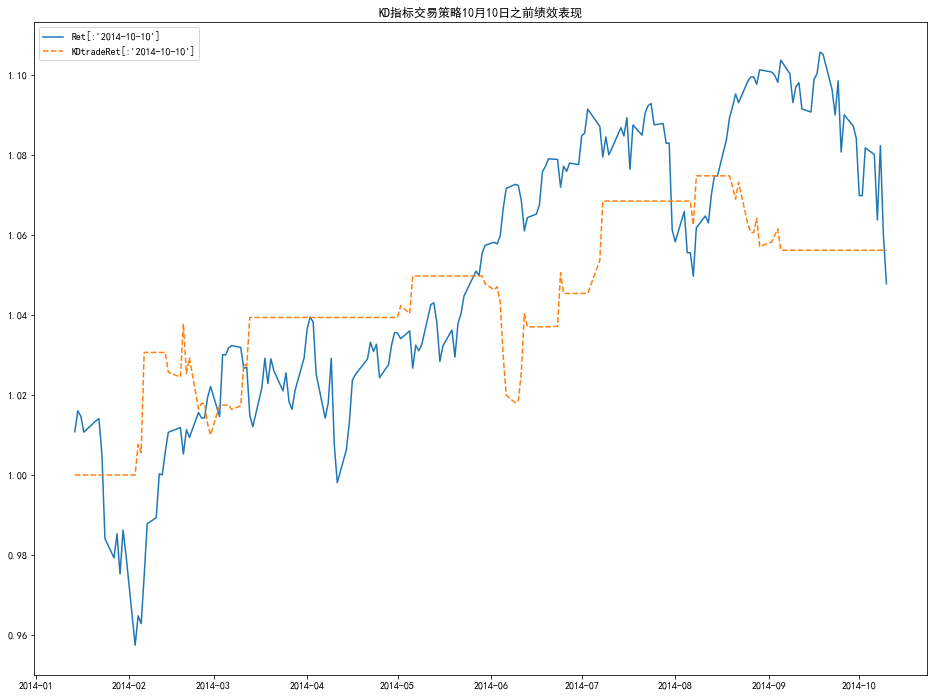

In [36]:
cumRets2 = (1 + KDtrade[:'2014-10-10']).cumprod()
plt.figure(figsize=(16, 12))
plt.plot(cumRets2.Ret,\
          label='''Ret[:'2014-10-10']''')
plt.plot(cumRets2.KDtradeRet,'--',\
          label='''KDtradeRet[:'2014-10-10']''')
plt.title('KD指标交易策略10月10日之前绩效表现')
plt.legend(loc='upper left')